In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


Signal shape: (3251,)
Datatype: int16
Signal duration: 0.41 seconds


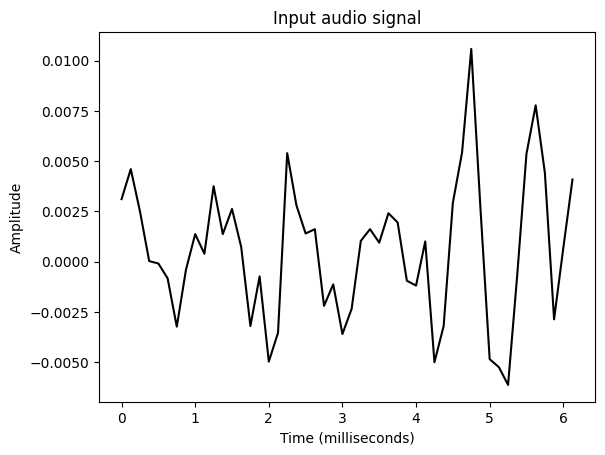

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the audio file
sampling_freq, signal = wavfile.read(r'C:\Users\smain\Downloads\apple02.wav')

# Display the params
print('\nSignal shape:', signal.shape)
print('Datatype:', signal.dtype)
print('Signal duration:', round(signal.shape[0] / float(sampling_freq), 2), 'seconds')

# Normalize the signal 
signal = signal / np.power(2, 15)

# Extract the first 50 values
signal = signal[:50]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

Ce bloc de code précédent permet d'analyser et de visualiser un signal audio à partir d’un fichier WAV. Il commence par lire le fichier audio grâce à wavfile.read(), récupérant ainsi la fréquence d’échantillonnage et les données du signal. Il affiche ensuite des informations essentielles comme la forme du signal, son type de données et sa durée en secondes. Ensuite, le signal est normalisé pour être compris entre -1 et 1. Pour faciliter la visualisation, seules les 50 premières valeurs du signal sont extraites. Un axe temporel en millisecondes est ensuite construit en fonction de la fréquence d’échantillonnage. Enfin, le code trace l’amplitude du signal en fonction du temps, permettant d’observer les variations du signal sonore sur une courte période. Ce programme est utile pour analyser des fichiers audio avant un traitement plus approfondi, par exemple en reconnaissance vocale ou traitement du signal.

---

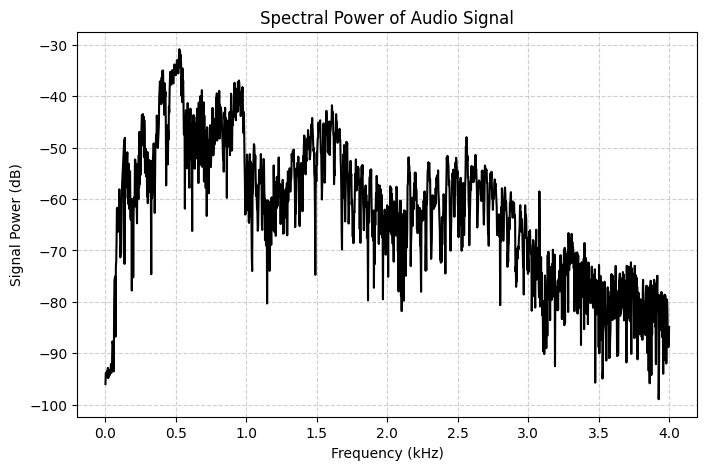

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the audio file
sampling_freq, signal = wavfile.read(r'C:\Users\smain\Downloads\apple02.wav')

# Convert to mono if stereo
if len(signal.shape) > 1:
    signal = signal[:, 0]  # Prendre un seul canal

# Normalize the signal dynamically
signal = signal / np.max(np.abs(signal))

# Length of the signal
len_signal = len(signal)
len_half = np.ceil((len_signal + 1) / 2.0).astype(int)

# Compute FFT and normalize
freq_signal = np.fft.fft(signal)
freq_signal = np.abs(freq_signal[:len_half]) / len_signal  # Magnitude
freq_signal **= 2  # Square the magnitude

# Adjust power spectrum (compensation for single-sided spectrum)
if len_signal % 2:
    freq_signal[1:] *= 2
else:
    freq_signal[1:-1] *= 2

# Convert to dB scale
signal_power = 10 * np.log10(freq_signal + 1e-10)  # Avoid log(0) error

# Build the frequency axis (up to Nyquist frequency)
x_axis = np.linspace(0, sampling_freq / 2, len_half) / 1000.0  # en kHz

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal Power (dB)')
plt.title('Spectral Power of Audio Signal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Ce bloc de code précédent effectue une analyse spectrale d’un signal audio en appliquant une Transformée de Fourier Rapide (FFT) pour extraire son spectre de puissance. Il commence par lire le fichier WAV et récupérer sa fréquence d’échantillonnage ainsi que les données audio. Si le signal est stéréo, il est converti en mono en ne gardant qu’un seul canal. Ensuite, il est normalisé dynamiquement pour éviter la saturation.

Une FFT est appliquée pour décomposer le signal en composantes fréquentielles et seule la moitié du spectre est conservée afin d’éliminer la redondance. L’amplitude du spectre est ensuite mise au carré pour obtenir la puissance du signal, puis convertie en décibels (dB) pour mieux interpréter les variations. L’axe fréquentiel est généré en kHz, correspondant à la moitié de la fréquence d’échantillonnage.

Enfin, le spectre de puissance est représenté graphiquement, ce qui permet d’identifier les fréquences dominantes du signal audio. Ce type d’analyse est couramment utilisé en traitement du signal audio, notamment pour l'étude des caractéristiques fréquentielles d’un son.

---

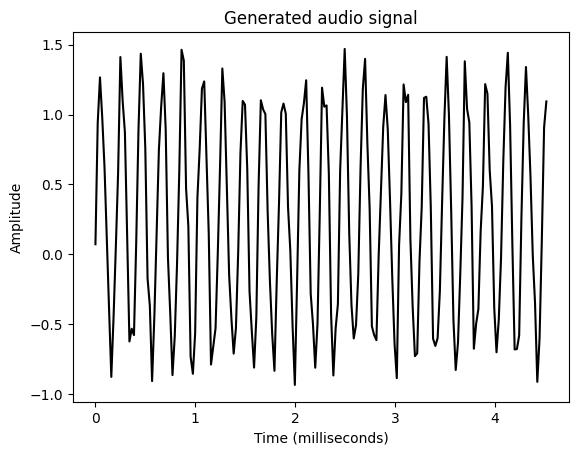

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'generated_audio.wav'

# Specify audio parameters
duration = 4  # in seconds
sampling_freq = 44100  # in Hz
tone_freq = 784 
min_val = -4 * np.pi
max_val = 4 * np.pi

# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

# Extract the first 200 values from the audio signal 
signal = signal[:200]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()



Ce bloc de code précédent génère un signal audio, y ajoute du bruit, le normalise et l’enregistre sous forme de fichier WAV. Il commence par définir les paramètres audio, notamment la durée du son (4 secondes), la fréquence d’échantillonnage (44100 Hz) et la fréquence du son (784 Hz). Ensuite, il crée un signal sinusoïdal à l’aide de la fonction sin(), qui représente une onde sonore pure.

Pour rendre le signal plus réaliste, un bruit aléatoire est ajouté. Le signal est ensuite mis à l’échelle en valeurs entières 16 bits pour correspondre au format audio standard. Une fois le signal converti et normalisé, il est enregistré sous forme de fichier WAV grâce à write().

Enfin, pour la visualisation, seules les 200 premières valeurs du signal sont extraites. L’axe temporel est converti en millisecondes, et le signal est affiché sous forme de courbe pour observer l'évolution de l'onde générée. Ce code est utile pour générer des sons synthétiques et tester des algorithmes de traitement du signal audio.

---

In [32]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import os

# Fonction pour générer un signal audio sinusoïdal
def tone_synthesizer(freq, duration, amplitude=0.5, sampling_freq=44100):
    """
    Génère une onde sinusoïdale pour une fréquence donnée.

    :param freq: Fréquence de la note (Hz)
    :param duration: Durée du son (secondes)
    :param amplitude: Amplitude du signal (0 à 1)
    :param sampling_freq: Fréquence d'échantillonnage (Hz)
    :return: Signal audio sous forme de tableau numpy int16
    """
    # Construire l'axe temporel
    time_axis = np.linspace(0, duration, int(duration * sampling_freq), endpoint=False)

    # Générer le signal audio
    signal = amplitude * np.sin(2 * np.pi * freq * time_axis)

    # Convertir en int16 pour stockage dans un fichier WAV
    return (signal * 32767).astype(np.int16)

if __name__ == '__main__':
    # Définition des fichiers de sortie
    file_tone_single = r'C:\Users\smain\Downloads\apple02.wav'
    file_tone_sequence = r'C:\Users\smain\Downloads\apple02_sequence.wav'
    mapping_file = r'C:\Users\smain\Downloads\tone_mapping.json'  # Chemin du fichier JSON

    # Vérifier si le fichier JSON existe
    if not os.path.exists(mapping_file):
        raise FileNotFoundError(f"❌ ERREUR : Le fichier {mapping_file} est introuvable !")

    # Lire et afficher le contenu du JSON
    with open(mapping_file, 'r') as f:
        try:
            tone_map = json.load(f)  # Charger le JSON
            print("✅ JSON chargé avec succès :", tone_map)
        except json.JSONDecodeError as e:
            raise ValueError(f"❌ ERREUR : Le fichier JSON est invalide !\n{e}")

    # Générer un son unique pour la note "F"
    tone_name = 'F'
    duration = 3  # secondes
    amplitude = 0.5  # Normalisation (évite saturation)
    sampling_freq = 44100  # Hz

    # Vérifier si la note est bien dans le JSON
    if tone_name not in tone_map:
        raise ValueError(f"❌ ERREUR : La note {tone_name} n'est pas définie dans tone_mapping.json")

    # Extraire la fréquence et générer le son
    tone_freq = tone_map[tone_name]
    synthesized_tone = tone_synthesizer(tone_freq, duration, amplitude, sampling_freq)

    # Enregistrer le fichier audio simple
    write(file_tone_single, sampling_freq, synthesized_tone)
    print(f"✅ Fichier généré avec succès : {file_tone_single}")

    # Définir une séquence de notes avec durées
    tone_sequence = [('G', 0.4), ('D', 0.5), ('F', 0.3), ('C', 0.6), ('A', 0.4)]

    # Construire un signal audio basé sur cette séquence
    signal = np.array([], dtype=np.int16)

    for item in tone_sequence:
        tone_name, duration = item

        # Vérifier si la note est dans le fichier JSON
        if tone_name not in tone_map:
            raise ValueError(f"❌ ERREUR : La note {tone_name} n'est pas définie dans tone_mapping.json")

        # Extraire la fréquence
        freq = tone_map[tone_name]

        # Générer le signal
        synthesized_tone = tone_synthesizer(freq, duration, amplitude, sampling_freq)

        # Ajouter le signal au fichier final
        signal = np.append(signal, synthesized_tone)

    # Sauvegarder la séquence en fichier WAV
    write(file_tone_sequence, sampling_freq, signal)
    print(f"✅ Séquence générée avec succès : {file_tone_sequence}")


✅ JSON chargé avec succès : {'C': 261.63, 'C#': 277.18, 'D': 293.66, 'D#': 311.13, 'E': 329.63, 'F': 349.23, 'F#': 369.99, 'G': 392.0, 'G#': 415.3, 'A': 440.0, 'A#': 466.16, 'B': 493.88}
✅ Fichier généré avec succès : C:\Users\smain\Downloads\apple02.wav
✅ Séquence générée avec succès : C:\Users\smain\Downloads\apple02_sequence.wav


Ce bloc de code précédent génère et enregistre des sons sinusoïdaux à partir d’un fichier JSON contenant un mappage de notes et de fréquences. Il commence par définir une fonction tone_synthesizer() qui crée une onde sinusoïdale en fonction d’une fréquence et d’une durée données.

Ensuite, il vérifie l'existence du fichier JSON et le charge pour récupérer les fréquences associées aux notes musicales. Il génère un son unique pour la note "F" en utilisant la fréquence correspondante et l’enregistre sous forme de fichier WAV.

Une séquence de notes est ensuite définie avec des durées spécifiques. Pour chaque note, le programme vérifie sa présence dans le fichier JSON, génère le signal sinusoïdal correspondant, puis concatène tous les sons pour former une séquence musicale. Ce signal est enfin enregistré sous forme de fichier audio WAV.

Ce programme est utile pour synthétiser et manipuler des sons basés sur des fréquences musicales, par exemple pour la génération de mélodies artificielles.

---

In [29]:
import os

mapping_file = r'C:\Users\smain\Downloads\tone_mapping.json'  # Chemin absolu


# Vérifier si le fichier existe
if not os.path.exists(mapping_file):
    print(f"❌ Le fichier {mapping_file} est introuvable !")
    raise FileNotFoundError(f"Le fichier {mapping_file} est manquant.")
else:
    print(f"✅ Le fichier {mapping_file} a été trouvé !")

# Ouvrir le fichier et afficher son contenu
with open(mapping_file, 'r') as f:
    content = f.read()

# Afficher le contenu pour voir s'il est correct
print("📄 Contenu du fichier JSON:")
print(content)

# Charger le JSON
tone_map = json.loads(content)
print("✅ JSON chargé avec succès !")


✅ Le fichier C:\Users\smain\Downloads\tone_mapping.json a été trouvé !
📄 Contenu du fichier JSON:
{
    "C": 261.63,
    "C#": 277.18,
    "D": 293.66,
    "D#": 311.13,
    "E": 329.63,
    "F": 349.23,
    "F#": 369.99,
    "G": 392.00,
    "G#": 415.30,
    "A": 440.00,
    "A#": 466.16,
    "B": 493.88
}

✅ JSON chargé avec succès !


In [4]:
!pip install python_speech_features


Using legacy 'setup.py install' for python-speech-features, since package 'wheel' is not installed.
    Running setup.py install for python-speech-features: started
    Running setup.py install for python-speech-features: finished with status 'done'


You should consider upgrading via the 'C:\Users\smain\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



✅ MFCC:
Nombre de fenêtres = 22
Longueur de chaque fenêtre = 13

✅ Filter bank:
Nombre de fenêtres = 22
Longueur de chaque fenêtre = 26


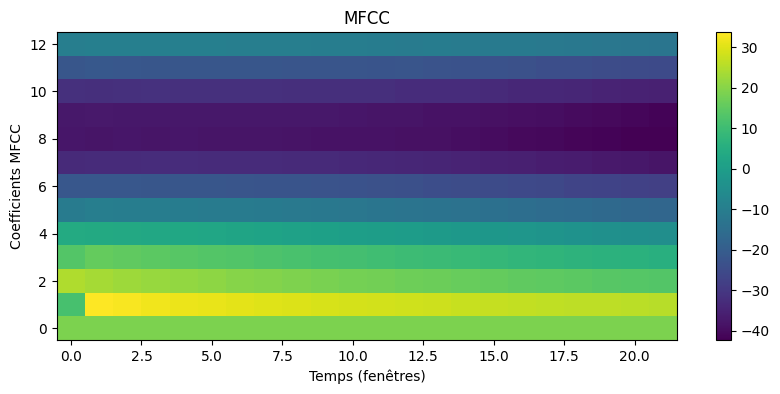

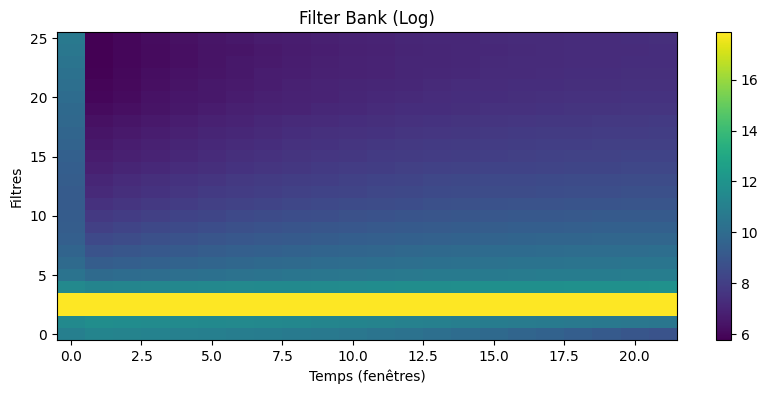

In [6]:
# Installer python_speech_features si nécessaire : pip install python_speech_features
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile 
from python_speech_features import mfcc, logfbank

# Définition du chemin du fichier audio
file_path = r'C:\Users\smain\Downloads\apple02.wav'

# Vérifier si le fichier existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"❌ ERREUR : Le fichier {file_path} est introuvable !")

# Lire le fichier audio
sampling_freq, signal = wavfile.read(file_path)

# Vérifier si l'audio est en mono ou stéréo
if len(signal.shape) > 1:
    print("🔄 Conversion en mono...")
    signal = np.mean(signal, axis=1).astype(np.int16)  # Convertir en mono

# Prendre les 10 000 premiers échantillons pour l'analyse
signal = signal[:10000]

# Vérifier que le signal est bien en int16 (évite erreurs MFCC)
signal = signal.astype(np.int16)

# Extraire les coefficients MFCC
features_mfcc = mfcc(signal, sampling_freq)

# Afficher les dimensions des MFCC
print('\n✅ MFCC:')
print(f'Nombre de fenêtres = {features_mfcc.shape[0]}')
print(f'Longueur de chaque fenêtre = {features_mfcc.shape[1]}')

# Extraire les coefficients de la banque de filtres
features_fb = logfbank(signal, sampling_freq)

# Afficher les dimensions des filtres en banque logarithmique
print('\n✅ Filter bank:')
print(f'Nombre de fenêtres = {features_fb.shape[0]}')
print(f'Longueur de chaque fenêtre = {features_fb.shape[1]}')

# Transposer les données pour une meilleure visualisation
features_mfcc = features_mfcc.T
features_fb = features_fb.T

# Affichage des MFCC
plt.figure(figsize=(10, 4))
plt.imshow(features_mfcc, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Temps (fenêtres)')
plt.ylabel('Coefficients MFCC')

# Affichage de la banque de filtres
plt.figure(figsize=(10, 4))
plt.imshow(features_fb, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar()
plt.title('Filter Bank (Log)')
plt.xlabel('Temps (fenêtres)')
plt.ylabel('Filtres')

# Affichage final
plt.show()





Le bloc de code précédent effectue une analyse des caractéristiques audio en extrayant les coefficients MFCC et les banques de filtres logarithmiques d’un fichier WAV. Il commence par vérifier l’existence du fichier audio, puis le charge avec SciPy (wavfile.read()). Si le fichier est stéréo, il est converti en mono en moyennant les canaux.

Seuls les 10 000 premiers échantillons sont conservés pour l’analyse. Les MFCC (Mel-Frequency Cepstral Coefficients) sont extraits, ce qui permet d’obtenir une représentation compacte des fréquences perçues par l’oreille humaine. Ensuite, les coefficients de la banque de filtres logarithmiques sont également calculés, fournissant une analyse spectrale plus détaillée.

Les résultats sont affichés sous forme de spectrogrammes avec Matplotlib, où les MFCC et la banque de filtres sont visualisés en fonction du temps. Ce type d'analyse est essentiel en traitement du signal audio et en reconnaissance vocale pour capturer les caractéristiques pertinentes du son. 